<a id='basic_regex'></a>

# REGEX

This mini project is a brief course on `regex`. Click [here](#section_id) to go to the advanced course on regex.


We'll be learning regular expressions while performing analysis on a dataset of submissions to popular technology site `Hacker News`.



<a id='columns'></a>

The dataset we will be working with is based off [this CSV of Hacker News stories from September 2015 to September 2016](https://www.kaggle.com/hacker-news/hacker-news-posts). The columns in the dataset are explained below:

   - `id`: The unique identifier from Hacker News for the story
   - `title`: The title of the story
   - `url`: The URL that the stories links to, if the story has a URL
   - `num_points`: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes
   - `num_comments`: The number of comments that were made on the story
   - `author`: The username of the person who submitted the story
   - `created_at`: The date and time at which the story was submitted


In [1]:
                                                                                                            import pandas as pd

In [2]:
hn=pd.read_csv('C:\\Users\\MY PC\\Desktop\\DATASETS\\hacker_news.csv')

In [3]:
hn

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48
...,...,...,...,...,...,...,...
20094,12379592,How Purism Avoids Intels Active Management Tec...,https://puri.sm/philosophy/how-purism-avoids-i...,10,6,AdmiralAsshat,8/29/2016 2:22
20095,10339284,YC Application Translated and Broken Down,https://medium.com/@zreitano/the-yc-applicatio...,4,1,zreitano,10/6/2015 14:57
20096,10824382,Microkernels are slow and Elvis didn't do no d...,http://blog.darknedgy.net/technology/2016/01/0...,169,132,vezzy-fnord,1/2/2016 0:49
20097,10739875,How Product Hunt really works,https://medium.com/@benjiwheeler/how-product-h...,695,222,brw12,12/15/2015 19:32


To easily check whether our regex matches each string in a list. We'll create a list of three simple strings to use while learning these concepts:

In [4]:
string_list = ["Julie's favorite color is Blue.",
               "Keli's favorite color is Green.",
               "Craig's favorite colors are blue and red."]

In [5]:
import re

In [6]:
pattern='Blue'
for s in string_list:
    if re.search(pattern, s):
        print('Match')
    else:
        print('No Match')

Match
No Match
No Match


So far, we didnt do anything with regular expressions that we couldn't do using the **`in`** keyword. The power of regular expressions comes when we use one of the special character sequences.

The first of these we'll learn is called a **set**. A set allows us to specify two or more characters that can match in a single character's position.
We define a set by placing the characters we want to match for in square brackets

In [7]:
#[msb]end
# The regex will match string mend,send and bend

Lets take another look at the strings mentioned above

In [8]:
string_list = ["Julie's favorite color is Blue.",
               "Keli's favorite color is Green.",
               "Craig's favorite colors are blue and red."]

In [9]:
blue_mentions = 0
pattern = '[Bb]lue'
for s in string_list:
    if re.search(pattern,s):
        blue_mentions += 1
print(blue_mentions)

2


We're going to use this technique to find out how many times Python is mentioned in the title of stories in our Hacker News dataset. We'll use a set to check for both Python with a capital 'P' and python with a lowercase 'p'.

In [10]:
# convert the title column to a list
titles = hn['title'].tolist()
pattern = '[Pp]ython'
python_mentions = 0
for s in titles:
    if re.search(pattern,s):
        python_mentions+=1
print(python_mentions)

160


**Python was was mentioned 160 times in the title column**

# Counting Matches with pandas Methods

We have learnt that we should avoid using loops in pandas, and that Vectorised methods are faster and require less codes. We can instead use the `series.str.contains()`method. Example shown below

In [11]:
eg_list = ["Julie's favorite color is green.",
           "Keli's favorite color is Blue.",
           "Craig's favorite colors are blue and red."]


In [12]:
#first convert the list to a series
eg_series = pd.Series(eg_list)

In [13]:
eg_series

0             Julie's favorite color is green.
1               Keli's favorite color is Blue.
2    Craig's favorite colors are blue and red.
dtype: object

In [14]:
pattern = '[Bb]lue'
pattern_contained = eg_series.str.contains(pattern)
pattern_contained

0    False
1     True
2     True
dtype: bool

In [15]:
pattern_count = pattern_contained.sum()

In [16]:
pattern_count

2

**If we wanted, we could use method chaining to do the whole operation on one line**

In [17]:
pattern_contained = eg_series.str.contains(pattern).sum()

In [18]:
pattern_contained

2

Let's use this technique to replicate the analysis we did in the previous screen. i.e To count the number of times python appears in title column

In [19]:
pattern = '[Pp]ython'
titles= hn['title']
python_count = titles.str.contains(pattern).sum()
python_count

160

#  Using regex to select Data

On the previous two screens, we used regular expressions to count how many titles contain Python or python. What if we wanted to view those titles? We can filter the column with the boolean mask

In that case, we can use the boolean array returned by `Series.str.contains()` to select just those rows from our series


In [20]:
titles[titles.str.contains(pattern)]

102                    From Python to Lua: Why We Switched
103              Ubuntu 16.04 LTS to Ship Without Python 2
144      Create a GUI Application Using Qt and Python i...
196      How I Solved GCHQ's Xmas Card with Python and ...
436      Unikernel Power Comes to Java, Node.js, Go, an...
                               ...                        
19597    David Beazley  Python Concurrency from the Gro...
19852      Ask HN: How to automate Python apps deployment?
19862                            Moving Away from Python 2
19980                        Python vs. Julia Observations
19998    Show HN: Decorating: Animated pulsed for your ...
Name: title, Length: 160, dtype: object

Let's use this technique to select all titles that mention the programming language `Ruby`, using a set to account for whether the word is capitalized or no

In [21]:
pattern = '[Rr]uby'
titles = hn['title']
ruby_contained = titles.str.contains(pattern)


In [22]:
titles[ruby_contained]

190                     Ruby on Google AppEngine Goes Beta
484           Related: Pure Ruby Relational Algebra Engine
1388     Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949     Rewriting a Ruby C Extension in Rust: How a Na...
2022     Show HN: CrashBreak  Reproduce exceptions as f...
2163                   Ruby 2.3 Is Only 4% Faster than 2.2
2306     Websocket Shootout: Clojure, C++, Elixir, Go, ...
2620                       Why Startups Use Ruby on Rails?
2645     Ask HN: Should I continue working a Ruby gem f...
3290     Ruby on Rails and the importance of being stup...
3749     Telegram.org Bot Platform Webhooks Server, for...
3874     Warp Directory (wd) unix command line tool for...
4026     OS X 10.11 Ruby / Rails users can install ther...
4163     Charles Nutter of JRuby Banned by Rubinius for...
4602     Quiz: Ruby or Rails? Matz and DHH were not abl...
5832     Show HN: An experimental Python to C#/Go/Ruby/...
6180     Shrine  A new solution for handling file uploa.

 # QUANTIFIERS

if we wanted to write a pattern that matches the numbers in text from `1000` to `2999` we could write the regular expression below...The name for this type of regular expression syntax is called a ***quantifier***.

In [23]:
#[1-2][0-9]{3}

If we want to match both e-mail and email.To do this, we would want to specify to match `-` either zero or one times.<br>
    The specific type of quantifier we saw above is called a **numeric quantifier**. 

Here are the different types of numeric quantifiers we can use:<br>
**a{3}** : Matches the character `a` three times<br>
**a{3,5}** : Matches the character `a` three, four or five times<br>
**a{,3}** : Matches the character `a` zero, one, two or three times<br>
**a{8,}** : Matches the character `a` eight or more times

In addition to numeric quantifiers, there are single characters in regex that specify some common quantifiers A summary of them is below:<br>
**a***: Matches the character `a` zero or more times.<br>
**a+**: Matches the character `a` one or more times.<br>
**a?**: Matches the character `a` zero or one times(optional)<br>


We're going to find how many titles in our dataset mention `email` or `e-mail`. To do this, we'll need to use `?`, the optional quantifier, to specify that the dash character `-` is optional in our regular expression.

In [24]:
email_bool=hn['title'].str.contains('e-?mail')
email_count = email_bool.sum()
# titles variable is already available from codes above
email_titles = titles[email_bool]
email_titles

119      Show HN: Send an email from your shell to your...
313          Disposable emails for safe spam free shopping
1361     Ask HN: Doing cold emails? helps us prove this...
1750     Protect yourself from spam, bots and phishing ...
2421                    Ashley Madison hack treating email
                               ...                        
18098    House panel looking into Reddit post about Cli...
18583    Mailgen  Generates clean, responsive HTML for ...
18847    Show HN: Crisp iOS keyboard for email and text...
19303    Ask HN: Why big email providers don't sign the...
19446    Tell HN: Secure email provider Riseup will run...
Name: title, Length: 86, dtype: object

 # Character Classes

Some stories submitted to Hacker News include a topic tag in brackets, like **[pdf]**. Here are a few examples of story titles with these tags:

`[video] Google Self-Driving SUV Sideswipes Bus`

`New Directions in Cryptography by Diffie and Hellman (1976) [pdf]`

`Wallace and Gromit  The Great Train Chase (1993) [video]`

Our next task is to find how many titles in our datasets have tags.<br>
Our first inclination may be to create the regex `[pdf]`. Unfortunately, the brackets would be interpreted as a set, so our pattern would match the single characters p, d, or f.



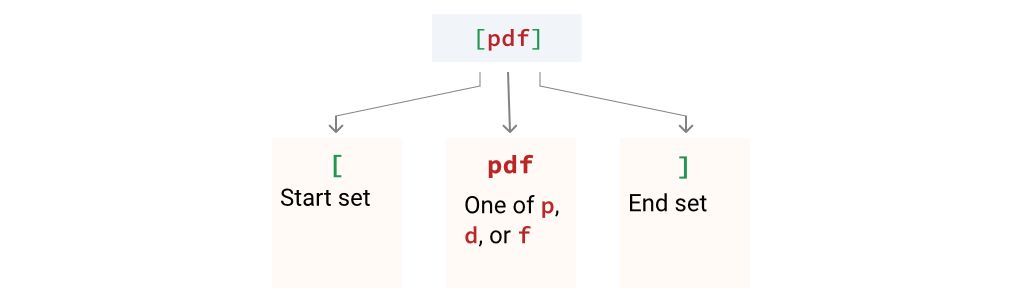

To match the substring "[pdf]", we can use backslashes to escape both the open and closing brackets: `\[pdf\]`

The other critical part of our task of identifying how many titles have tags is knowing how to match the characters between the brackets (like pdf and video) without knowing ahead of time what the different topic tags will be.

To match unknown characters using regular expressions, we use character classes. Character classes allow us to match certain groups of characters. We've actually seen two examples of character classes already:

   1. The set notation using brackets to match any of a number of characters.
   2. The range notation, which we used to match ranges of digits (like [0-9]).<br>
   
   # Summary of the syntax for the character classes


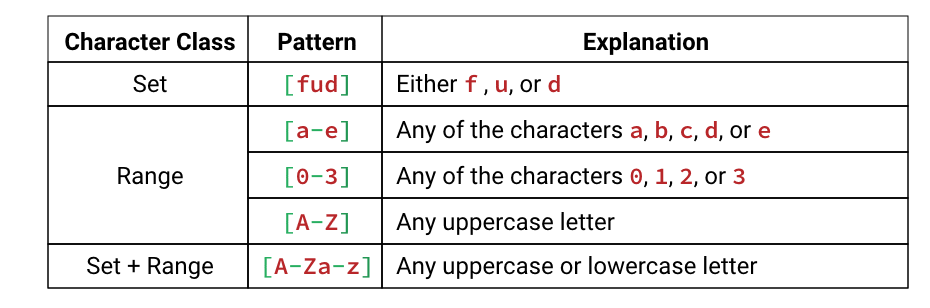

Just like with quantifiers, there are some other common character classes which we'll use a lot.<br>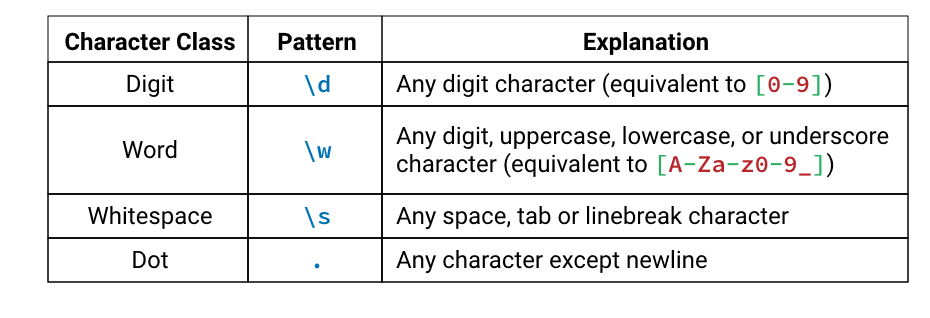

The one that we'll be using in order to match characters in tags is `\w`, which represents any digit uppercase or lowercase letter. Each character class represents a single character, so to match multiple characters (e.g. words like `video` and `pdf`), we'll need to combine them with quantifiers.

In order to match word characters between our brackets, we can combine the word character class `(\w)` with the 'one or more' quantifier (+), giving us a combined pattern of `\w+`.

This will match sequences like pdf, video, Python, and 2018 but won't match a sequence containing a space or punctuation character like PHP-DEV or XKCD Flowchart. If we wanted to match those tags as well, we could use `.+`; however, in this case, we're just interested in single-word tags without special characters.

**We'll use these concepts to count the number of titles that contain a tag.**

In [25]:
pattern = '\[\w+\]'
tag_titles =titles[titles.str.contains(pattern)]
tag_count = tag_titles.shape[0]

In [26]:
tag_count

444

  # Accessing the Matching Text with Capture Groups

In Python, a backslash followed by certain characters represents an escape sequence — like the `\n` sequence — which we previously learned represents a new line. These escape sequences can result in unintended consequences for our regular expressions. Let's take a look at a string containing the substring `\b`.

In [27]:
print('hello\b world')

hello world


The escape sequence `\b` represents a backspace, so the final letter from our string is removed. The character sequence `\b` has a special meaning in regular expressions. We need a way to write these characters without triggering the escape sequence. One way is to add an extra backlash before the 'b'.

In [28]:
print('hello\\b world')

hello\b world


   This can make regular expressions even more difficult to read and interpret, so instead we use [raw strings](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals), which we denote by prefixing our string with the `r` character. raw strings are strongly recommened whenever we write regex instead of remembering which are escape characters and writing it selectively

print(r'hello\b world')

In our previous exercise, we were able to calculate that 444 of the 20,100 Hacker News stories in our dataset contain tags. What if we wanted to find out what the text of these tags were, and how many of each are in the dataset?

In order to do this, we'll need to use **capture groups**. Capture groups allow us to specify one or more groups within our match that we can access separately.<br> *`We specify capture groups using parenthesis`*

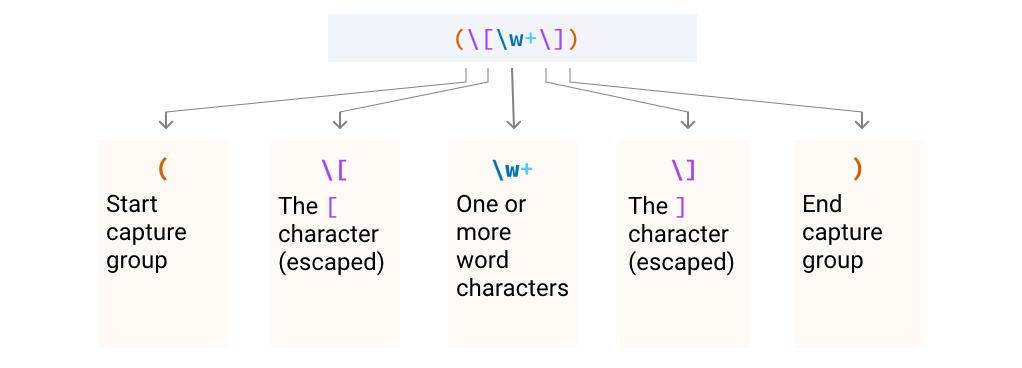

In [29]:
# first five matching characters from title tag
tag_5 = tag_titles.head()
tag_5

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

**We use the Series.str.extract() method to extract the match within our parentheses:**

In [30]:
pattern = r'(\[\w+\])'
tag_5_matches = tag_5.str.extract(pattern)
tag_5_matches

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]


**We can move our parentheses inside the brackets to get just the text:**

In [31]:
pattern = r'\[(\w+)\]'
tag_5_matches = tag_5.str.extract(pattern, expand=False)
# we used the expand = False because by default our version of pandas returns a df instead of series, so we can use the value_counts()
tag_5_matches

66        pdf
100    German
159       pdf
162       pdf
195      Beta
Name: title, dtype: object

In [32]:
# get a frequency table of the tags
tag_5_freq = tag_5_matches.value_counts()
tag_5_freq

pdf       3
German    1
Beta      1
Name: title, dtype: int64

Let's use this technique to extract all of the tags from the Hacker News titles and build a frequency table of those tags.

In [33]:
pattern = r'\[(\w+)\]'
tag_freq = titles.str.extract(pattern, expand =False).value_counts(dropna=False)
tag_freq

NaN            19655
pdf              276
video            111
2015               3
audio              3
2014               2
beta               2
slides             2
2008               1
Excerpt            1
SPA                1
Live               1
blank              1
Challenge          1
USA                1
survey             1
crash              1
1996               1
transcript         1
viz                1
ANNOUNCE           1
Map                1
much               1
Benchmark          1
ask                1
JavaScript         1
Infograph          1
song               1
5                  1
CSS                1
Petition           1
German             1
Skinnywhale        1
videos             1
repost             1
detainee           1
Beta               1
coffee             1
Australian         1
gif                1
SpaceX             1
Ubuntu             1
satire             1
map                1
React              1
updated            1
png                1
GOST         

# Negative Character Classes

REGEX are usually more complex than we have seen from above

In order to work faster as you build your regular expression, it can be helpful to create a function that returns the first few matching strings

In [34]:
def first_10_matches(pattern):
    '''Return the first 10 story titles that match
    the provided regular expression'''
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

Another useful approach is to use an online tool like [RegExr](https://regexr.com/) that allows you to build regular expressions and includes syntax highlighting, instant matches, and regex syntax reference.<br> We will use the `first_10_matches` we just built to iteratively build our regex.

In [35]:
# learn how to use the RegExr
# regex that matches Java
pattern = r'[Jj]ava'
first_10_matches(pattern)

267      Show HN: Hire JavaScript - Top JavaScript Talent
436     Unikernel Power Comes to Java, Node.js, Go, an...
580     Python integration for the Duktape Javascript ...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1046    If you write JavaScript tools or libraries, bu...
1093    Rollup.js: A next-generation JavaScript module...
1162                 V8 JavaScript Engine: V8 Release 5.4
1195                   Proposed JavaScript Standard Style
1314           Show HN: Design by Contract for JavaScript
Name: title, dtype: object

We can see that there are a number of matches that contain Java as part of the word JavaScript. We want to exclude these titles from matching so we get an accurate count. One way to do this is by using the **Negative Character Index**. Negative character classes are character classes that match every character except a character class. Let's look at a table of the common negative character classes:
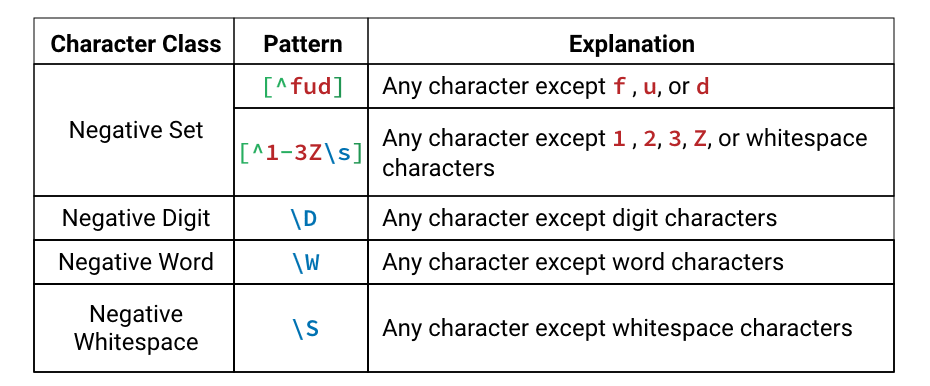

Let's use the negative set **[^Ss]** to exclude instances like JavaScript and Javascript

In [36]:
def first_10_matches(pattern):
    '''Returns the first 10 matches of the story title
    that matches the regex'''
    all_matches = hn['title'][hn['title'].str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10
pattern = r'[Jj]ava[^Ss]'
java_titles = hn['title'][hn['title'].str.contains(pattern)]
java_titles.head(10)

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
2910                2016 JavaOne Intel Keynote  32mn Talk
3452    What are the Differences Between Java Platform...
Name: title, dtype: object

 # Word Boundaries

While the negative set was effective in removing any bad matches that mention JavaScript, it also had the side-effect of removing any titles where Java occurs at the end of the string, like this title:

`Pippo  Web framework in Java`

This is because the negative set **[^Ss]** must match one character. Instances at the end of a string aren't followed by any characters, so there is no match.

A different approach to take in cases like these is to use the word boundary anchor, specified using the syntax **\b**. A word boundary matches the position between a word character and a non-word character, or a word character and the start/end of a string. The diagram below shows all the word boundaries in an example string:
This is because the negative set [^Ss] must match one character. Instances at the end of a string aren't followed by any characters, so there is no match.



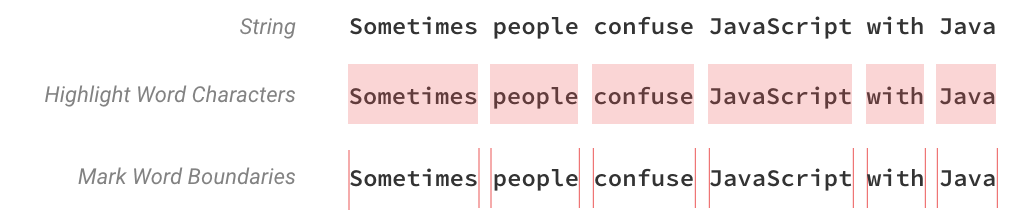

In [37]:
import re
string = 'Sometimes people confuse JavaScript with Java'
pattern_1 = r'[Jj]ava[^S]'
if re.search(pattern_1,string):
    print('match')
else:
    print('No match')

No match


The regular expression prints 'No match', because there is no substring that contains Java followed by a character that isn't S

In [38]:
# using world boundaries
pattern_2 = r'\bJava\b'
if re.search(pattern_2,string):
    print('match')
else:
    print('No match')

match


With the word boundary, our pattern matches the Java at the end of the string.

Let's use the word boundary anchor as part of our regular expression to select the titles that mention Java.

In [39]:
#creating the regex
pattern = r'\b[Jj]ava\b'
java_titles = titles[titles.str.contains(pattern)]
java_titles

436      Unikernel Power Comes to Java, Node.js, Go, an...
811      Ask HN: Are there any projects or compilers wh...
1023                          Pippo  Web framework in Java
1972           Node.js vs. Java: Which Is Faster for APIs?
2093                     Java EE and Microservices in 2016
2367     Code that is valid in both PHP and Java, and p...
2493     Ask HN: I've been a java dev for a couple of y...
2751                 Eventsourcing for Java 0.4.0 released
3228                               Comparing Rust and Java
3452     What are the Differences Between Java Platform...
3627                     Friends don't let friends do Java
4273      Ask HN: Is Bloch's Effective Java Still Current?
4624     Oracle Discloses Critical Java Vulnerability i...
5461                        Lambdas (in Java 8) Screencast
5847     IntelliJ IDEA and the whole IntelliJ platform ...
6268             Oracle deprecating Java applets in Java 9
7436     Forget Guava: 5 Google Libraries Java Develope.

# Matching at the start and end of strings

On the previous screen, we learned that the **word boundary anchor** matches the space between a word character and a non-word character. More generally in regular expressions, an anchor matches something that isn't a character, as opposed to character classes which match specific characters.

Other than the word boundary anchor, the other two most common anchors are the **beginning anchor** and the **end anchor**, which represent the start and the end of the string.

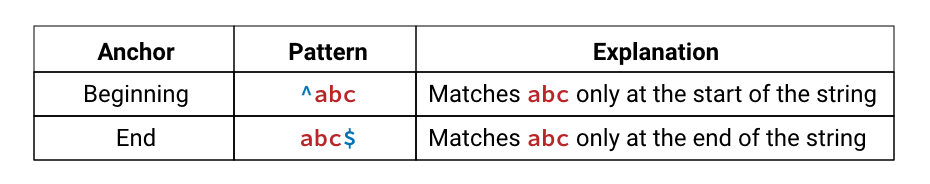

Note that the `^` character is used both as a beginning anchor and to indicate a negative set, depending on whether the character preceding it is a `[` or not.

Let's start with a few test cases that all contain the substring `Red` at different parts of the string, as well as a test function:

In [40]:
test_cases = pd.Series([
    "Red Nose Day is a well-known fundraising event",
    "My favorite color is Red",
    "My Red Car was purchased three years ago"
])
print(test_cases)

0    Red Nose Day is a well-known fundraising event
1                          My favorite color is Red
2          My Red Car was purchased three years ago
dtype: object


If we want to match the word Red only if it occurs at the start of the string, we add the beginning anchor only at the beginning of our regex

In [41]:
pattern_1=r'^Red'
test_cases.str.contains(pattern_1)

0     True
1    False
2    False
dtype: bool

If we want to match the word Red only if it occurs at the end of the string, we add the end anchor only at the end of our regex

pattern_2=r'Red$'
test_cases.str.contains(pattern_2)

Let's use the beginning and end anchors to count how many titles have tags at the start versus the end of the story title in our Hacker News dataset.

In [42]:
pattern_beginning=r'^\[\w+\]'
beginning_count = titles.str.contains(pattern_beginning).sum()
beginning_count

15

In [43]:
pattern_ending=r'\[\w+\]$'
ending_count = titles.str.contains(pattern_ending).sum()
ending_count

417

# Challenge: Using Flags to Modify Regex Patterns

Up until now, we've been using sets like [Pp] to match different capitalizations in our regular expressions. This strategy works well when there is only one character that has capitalization, but becomes cumbersome when we need to cater for multiple instances.

Within the titles, there are many different formatting styles used to represent the word "email." Here is a list of the variations:


`email
Email
e Mail
e mail
E-mail
e-mail
eMail
E-Mail
EMAIL
emails
Emails
E-Mails`

To write a regular expression for this, we would need to use a set for all five letters in email, which would make our regular expression very hard to read.

Instead, we can use **`flags`** to specify that our regular expression should ignore case.

Both `re.search()` and the pandas regular expression methods accept an optional `flags` argument. This argument accepts one or more flags, which are special variables in the re module that modify the behavior of the regex interpreter.

A [list of all available flags](https://docs.python.org/3/library/re.html#re.A) is in the documentation, but by far the most common and the most useful is the re.IGNORECASE [flag](https://docs.python.org/3/library/re.html#re.I), which is also available using the alias `re.I` for convenience.

When you use this flag, all uppercase letters will match their lowercase equivalents and vice versa. Let's look at an example without using the flag:

In [44]:
email_tests = pd.Series(['email', 'Email', 'eMail', 'EMAIL'])
email_tests.str.contains(r'email')

0     True
1    False
2    False
3    False
dtype: bool

Now let's look at what happens when we use the flag:

In [45]:
email_tests.str.contains(r'email',flags=re.I)

0    True
1    True
2    True
3    True
dtype: bool

Write a regular expression that will match all variations of email included in the starter code.

In [46]:
email_test = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])
email_test

0       email
1       Email
2      e Mail
3      e mail
4      E-mail
5      e-mail
6       eMail
7      E-Mail
8       EMAIL
9      emails
10     Emails
11    E-Mails
dtype: object

In [47]:
pattern=r'\be[\-\s]?mails?\b'
email_test.str.contains(pattern,flags=re.I)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
dtype: bool

In [48]:
email_mentions=titles.str.contains(pattern,flags=re.I).sum()
email_mentions

141

<a id='section_id'></a>

click [here](#basic_regex) to return to the Basic regex course

# ADVANCED REGULAR EXPRESSION
   # Introduction

 We learned that regular expressions provide powerful ways to describe patterns in text that can help us clean and extract data. In this mission, we're going to build on those foundational principles, and learn:

   - Several new regex syntax components to allow us to express more complex criteria.
   - How to combine regular expression patterns to extract and transform data.
   - How to replace and clean data using regular expressions

We're going to continue working with the dataset from the previous mission from technology site [Hacker News](https://news.ycombinator.com/). Click [here](#columns) to refresh your memory on the different columns of the datasets

We'll continue to analyze and count mentions of different programming languages in the dataset, and then we'll finish by extracting the different components of the URLs submitted to Hacker News.

In the story titles, we have two different capitalizations for the Python language: `Python` and `python`.<br>In the basic lesson, we learned two techniques for handling cases like these. The first is to use a set to match either P or p:

In [49]:
pattern = r'[Pp]ython'
python_count=titles.str.contains(pattern).sum()
python_count

160

The second option we learned is to use re.I — the ignorecase flag — to make our pattern case insensitive:


In [50]:
pattern=r'python'
python_count=titles.str.contains(pattern,flags=re.I).sum()
python_count

160

The ignorecase flag is particularly useful when we have many different capitalizations for a word or phrase. In our dataset, the SQL language has three different capitalizations: SQL, sql, and Sql.<br> To use sets to capture all of these variations, we would need to use a set for each character:


In [51]:
pattern = r"[Ss][Qq][Ll]"
sql_counts = titles.str.contains(pattern).sum()
print(sql_counts)

108


In [52]:
pattern=r'SQL'
sql_counts=titles.str.contains(pattern,flags=re.I).sum()
sql_counts

108

 # Capture Groups

In the previous exercise, we counted the number of mentions of "SQL" in the titles of stories. As we learned in the previous mission, to extract those mentions, we need to do two things:

   - Use the Series.str.extract() method.
   - Use a regex capture group.

We define a capture group by wrapping the part of our pattern we want to capture in parentheses. If we want to capture the whole pattern, we just wrap the whole pattern in a pair of parentheses:

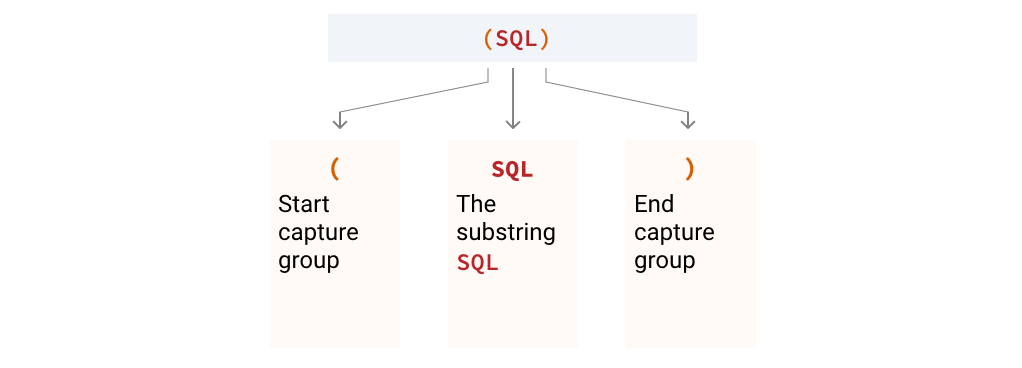

Let's look at how we can use a capture group to create a frequency table of the different capitalizations of SQL in our dataset. We start by wrapping our regex pattern in parentheses:

In [53]:
# create regex with capturing group to extract sql
pattern = r'(SQL)'
'''while extracting the regex,
we set expand parameter to false because by default it returns a df,
so value_counts can work'''
sql_capitalizations = titles.str.extract(pattern,flags=re.I,expand=False)
sql_capitalizations_freq = sql_capitalizations.value_counts()
sql_capitalizations_freq


SQL    101
Sql      4
sql      3
Name: title, dtype: int64

We can extend this analysis by looking at titles that have letters immediately before the "SQL," which is a convention often used to denote different variations or flavors of SQL:

In [54]:
pattern = r'(\w+SQL)'
sql_flavors = titles.str.extract(pattern,flags=re.I,expand=False)
sql_flavors_freq = sql_flavors.value_counts() 
sql_flavors_freq

PostgreSQL    27
NoSQL         16
MySQL         12
nosql          1
SparkSQL       1
CloudSQL       1
MemSQL         1
mySql          1
Name: title, dtype: int64

Notice how there is some duplication due to varied capitalization in this frequency table:

   - NoSQL and nosql
   - MySQL and mysql


In this exercise, we're going to extract the mentions of different SQL flavors into a new column and clean those duplicates by making them all lowercase. We'll then analyze the results to look at the average number of comments for each flavor.

In [55]:
# we have created a data frame called hn_sql
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql['flavor'] = hn['title'].str.extract(r"(\w+SQL)", flags=re.I)
hn_sql['flavor'] =hn_sql['flavor'].str.lower()
sql_pivot = hn_sql.pivot_table(index="flavor",values="num_comments", aggfunc='mean')
sql_pivot



,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


In [56]:
hn_sql.head()

,id,title,url,num_points,num_comments,author,created_at,flavor
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21,postgresql
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32,memsql
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55,postgresql
1160,10546681,How to choose an in-memory NoSQL solution: Per...,http://articles.rvncerr.org/how-to-chose-an-in...,9,4,rvncerr,11/11/2015 14:04,nosql
1197,11583183,Postgraphql: A GraphQL schema created by refle...,https://github.com/calebmer/postgraphql,217,24,craigkerstiens,4/27/2016 18:29,postgresql


# Using Capture Groups to Extract Data

So far we've used capture groups to extract all or most of the text in our regular expression pattern. Capture groups can also be useful to extract specific data from within our expression.

Let's look at a sample of Hacker News titles that mention Python:<br> `Developing a computational pipeline using the asyncio module in Python 3
Python 3 on Google App Engine flexible environment now in beta
Python 3.6 proposal, PEP 525: Asynchronous Generators
How async/await works in Python 3.5.0
Ubuntu Drops Python 2.7 from the Default Install in 16.04
Show HN: First Release of Transcrypt Python3.5 to JavaScript Compiler`


All of these examples have a number after the word "Python," which indicates a version number. Sometimes a space precedes the number, sometimes it doesn't. We can use the following regular expression to match these cases:

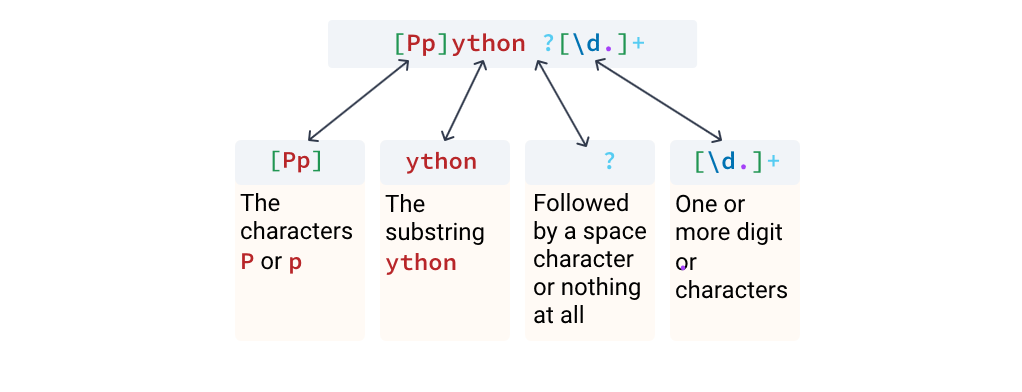

We can use capture groups to extract the version of Python that is mentioned most often in our dataset by wrapping parentheses around the part of our regular expression which captures the version number.

We'll use a capture group to capture the version number after the word "Python," and then build a frequency table of the different versions.

In [57]:
pattern = r'python ([\d\.]+)'
py_versions = titles.str.extract(pattern,flags=re.I,expand=False)
py_versions_freq = dict(py_versions.value_counts())
py_versions_freq

{'3': 10,
 '2': 3,
 '3.5': 3,
 '3.6': 2,
 '3.5.0': 1,
 '8': 1,
 '1.5': 1,
 '4': 1,
 '2.7': 1}

 # Counting Mentions of the 'C' Language

So far, we've created regular expressions to clean and analyze the number of mentions of the Python, SQL, and Java languages. Next up: counting the mentions of the C language.<br> We can start with a simple regular expression and then iterate as we find and exclude incorrect matches. Let's start with a simple regex that matches the letter "c" with word boundary anchors on either side:

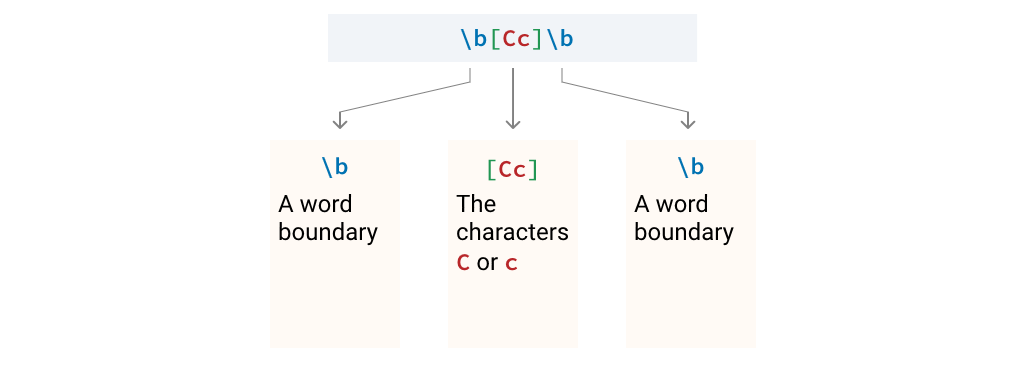

We'll re-use the `first_10_matches()` function that we defined in the previous mission to see the results we get from this regular expression:

In [58]:
# rewriting the code for first_10 matches
def first_10_matches(pattern):
    all_matches = titles[titles.str.contains(pattern,flags=re.I)]
    first_10 = all_matches.head(10)
    return first_10
pattern = r'\b[C]\b'#or r'\b[Cc]\b without flags=re.I
first_10_matches(pattern)

13                 Custom Deleters for C++ Smart Pointers
220                        Lisp, C++: Sadness in my heart
221                  MemSQL (YC W11) Raises $36M Series C
353     VW C.E.O. Personally Apologized to President O...
365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
508     BDE 3.0 (Bloomberg's core C++ library): Open S...
521          Fuchsia: Micro kernel written in C by Google
549     How to Become a C.E.O.? The Quickest Path Is a...
1282    A lightweight C++ signals and slots implementa...
Name: title, dtype: object

 We can quickly identify a few match types we want to prevent:

   - Mentions of C++, a distinct language from C.
   - Cases where the letter C is followed by a period, like in the substring C.E.O.


Let's use a negative set to prevent matches for the `+` character and the `.` character.

In [59]:
pattern = r'\b[C]\b[^.+]'
first_ten = first_10_matches(pattern)
first_ten

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object

#  Using Lookarounds to Control Matches Based on Surrounding Text

Additionally, we've run into the same issue as we did in the previous mission — by using a negative set, we may have eliminated any instances where the last character of the title is "C" (the second last line of output matches in spite of the fact that it ends with "C," because it also has "C" earlier in the string).

Neither of these can be avoided using negative sets, which are used to allow multiple matches for a single character. Instead we'll need a new tool: **lookarounds**.

Lookarounds let us define a character or sequence of characters that either must or must not come before or after our regex match. There are four types of lookarounds:

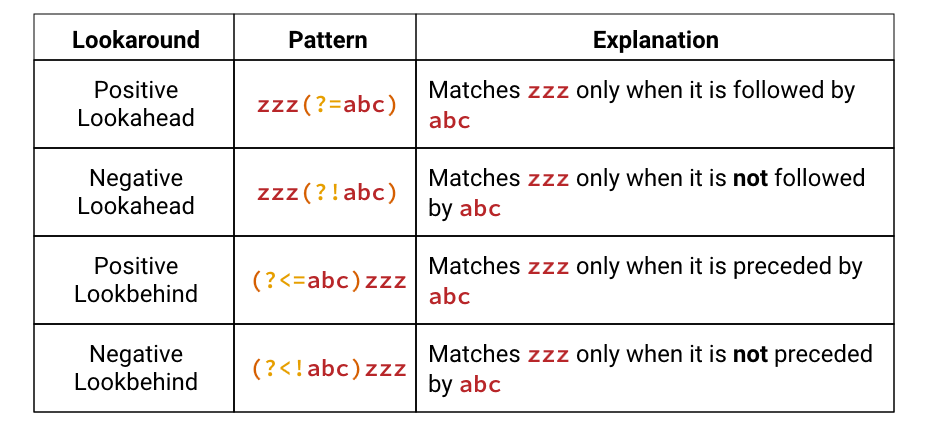

These tips can help you remember the syntax for lookarounds:

   - Inside the parentheses, the first character of a lookaround is always `?`.
   - If the lookaround is a lookbehind, the next character will be `<`, which you can think of as an arrow head pointing behind the match.
   - The next character indicates whether the lookaround is positive `(=)` or negative `(!)`.


Let's create some test data that we'll use to illustrate how lookarounds work:

In [60]:
test_cases = ['Red_Green_Blue',
              'Yellow_Green_Red',
              'Red_Green_Red',
              'Yellow_Green_Blue',
              'Green']

We'll also create a function that will loop over our test cases and tell us whether our pattern matches. We'll use the `re` module rather than pandas since it tells us the exact text that matches, which will help us understand how the lookaround is working

In [61]:
def run_test_cases(pattern):
    for tc in test_cases:
        result = re.search(pattern,tc)
        print(result or 'No match')


In each instance, we'll aim to match the substring `Green` depending on the characters that precede or follow it. Let's start by using a **positive lookahead** to include instances where the match is followed by the substring `_Blue`. We'll include the underscore character in the lookahead, otherwise we will get zero matches

In [62]:
pattern = r"Green(?=_Blue)"
run_test_cases(pattern)

<re.Match object; span=(4, 9), match='Green'>
No match
No match
<re.Match object; span=(7, 12), match='Green'>
No match


Notice how the matches themselves are purely the text `Green` and don't include the lookahead. Let's look at a **negative lookahead** to include instances where the match is not followed by the substring `_Red`:

In [63]:
pattern = r'Green(?!_Red)'
run_test_cases(pattern)

<re.Match object; span=(4, 9), match='Green'>
No match
No match
<re.Match object; span=(7, 12), match='Green'>
<re.Match object; span=(0, 5), match='Green'>


Next we'll use a **positive lookbehind** to include instances where the match is preceded by the substring `Red_`:

In [64]:
pattern = r'(?<=Red_)Green'

run_test_cases(pattern)

<re.Match object; span=(4, 9), match='Green'>
No match
<re.Match object; span=(4, 9), match='Green'>
No match
No match


And finally, using a **negative lookbehind** to include instances where the match isn't preceded by the substring `Yellow_`:

In [65]:
pattern = r'(?<!Yellow_)Green'
run_test_cases(pattern)

<re.Match object; span=(4, 9), match='Green'>
No match
<re.Match object; span=(4, 9), match='Green'>
No match
<re.Match object; span=(0, 5), match='Green'>


The contents of a lookaround can include any other regular expression component. For instance, here is an example where we match only cases that are followed by exactly five characters:

In [66]:
pattern = r'Green(?=.{5})'
run_test_cases(pattern)

<re.Match object; span=(4, 9), match='Green'>
No match
No match
<re.Match object; span=(7, 12), match='Green'>
No match


The second and third test cases are followed by four characters, not five, and the last test case isn't followed by anything.

Sometimes programming languages won't implement support for all lookarounds (notably, lookbehinds are not in the official JavaScript specification). As an example, to get full support in the RegExr tool, you'll need to set it to use the PCRE regex engine.

In this exercise, we're going to use lookarounds to refine the regular expression we build on the last screen to capture mentions of the "C" programming language. As a reminder, here is the last of the regular expressions we attempted to use with this exercise earlier, and the resultant titles that match:


In [67]:
first_10_matches(r'\b[Cc]\b[^.+]')

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object

Let's now use lookarounds to exclude the matches we don't want. We want to:

   - Keep excluding matches that are followed by `.` or `+`, but still match cases where "C" falls at the end of the string.
   - Exclude matches that have the word 'Series' immediately preceding them.



In [68]:
pattern = r'(?<!Series\s)\b[Cc]\b(?![\.+])'
c_mentions = titles.str.contains(pattern).sum()
c_mentions

102

 # BackReferences: Using Capture Groups in a RegEx Pattern

Let's say we wanted to identify strings that had words with double letters, like the "ee" in "feed." Because we don't know ahead of time what letters might be repeated, we need a way to specify a capture group and then to repeat it. We can do this with **backreferences.**

Whenever we have one or more capture groups, we can refer to them using integers left to right as shown in this regex that matches the string HelloGoodbye:

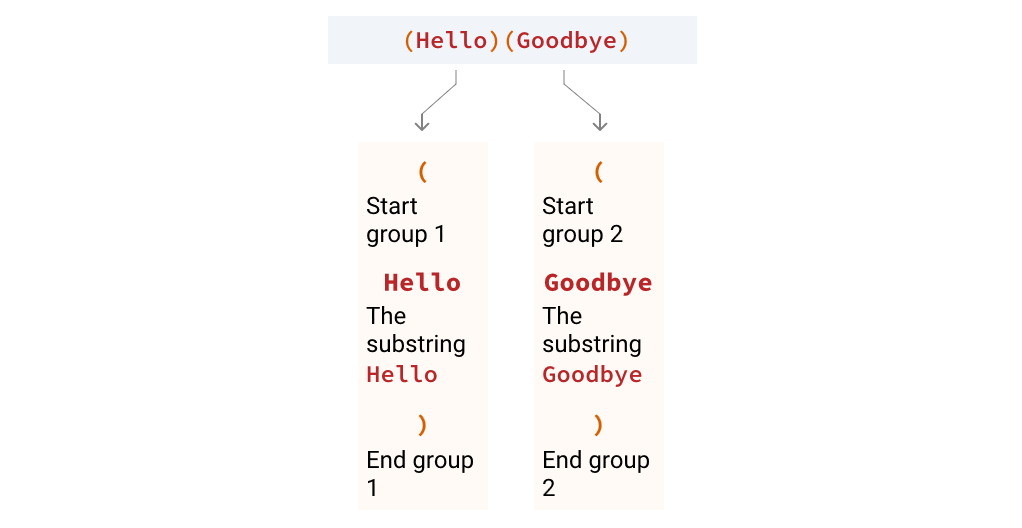

Within a regular expression, we can use a backslash followed by that integer to refer to the group:

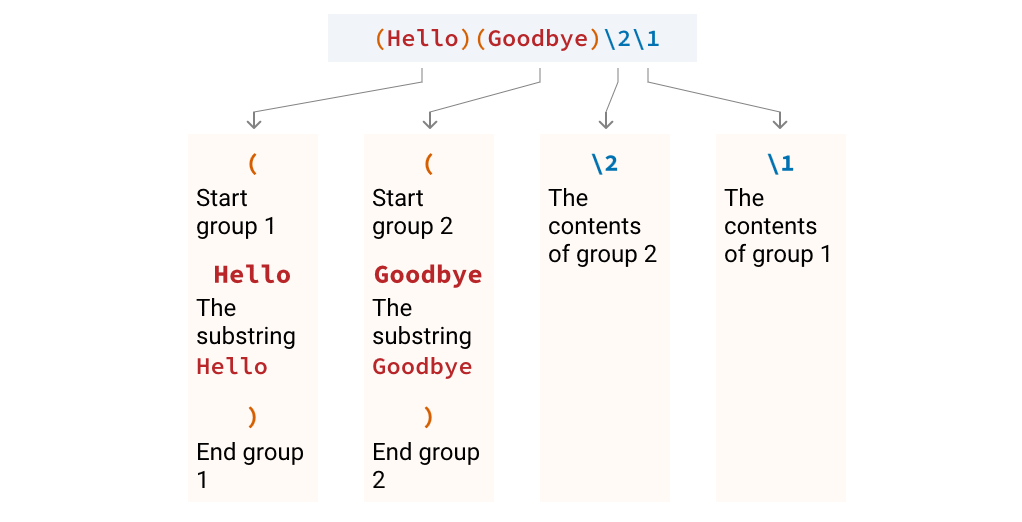

The regular expression above will match the text `HelloGoodbyeGoodbyeHello`. Let's look at how we could write a regex to capture instances of the same two word characters in a row:



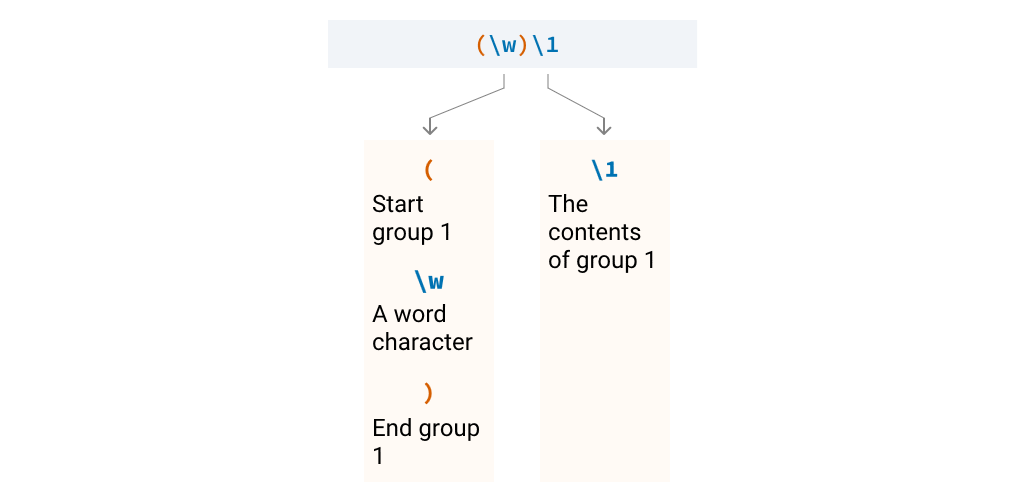

Let's see this in action using Python:


In [73]:
test_cases = [
              "I'm going to read a book.",
              "Green is my favorite color.",
              "My name is Aaron.",
              "No doubles here.",
              "I have a pet eel."
             ]
pattern = r'(\w)\1'
for tc in test_cases:
    print(re.search(pattern,tc))
    #print(re.search(r"(\w)\1", tc))
        

<re.Match object; span=(21, 23), match='oo'>
<re.Match object; span=(2, 4), match='ee'>
None
None
<re.Match object; span=(13, 15), match='ee'>


Notice that there was no match for the word `Aaron`, despite it containing a double "a." This is because the uppercase and lowercase "a" are two different characters, so the backreference does not match.

We can easily achieve the same thing using pandas:


In [80]:
test_cases=pd.Series(test_cases)
print(test_cases.str.contains(r'(\w)\1'))
test_cases[test_cases.str.contains(r'(\w)\1')]


0     True
1     True
2    False
3    False
4     True
dtype: bool


0      I'm going to read a book.
1    Green is my favorite color.
4              I have a pet eel.
dtype: object

Let's use this technique to identify story titles that have repeated words.

In [84]:
pattern = r'\b(\w+)\s\1\b'
repeated_words = titles[titles.str.contains(pattern)]
repeated_words

3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object

 # Substituting Regular Expression Matches

When we learned to work with basic string methods, we used the `str.replace()` method to replace simple substrings. We can achieve the same with regular expressions using the `re.sub()` function. The basic syntax for `re.sub()` is

**re.sub(pattern, repl, string, flags=0)**

In [85]:
string = "aBcDEfGHIj"
re.sub(r'[A-Z]', '-', string, flags=0)

'a-c--f---j'

The `repl` parameter is the text that you would like to substitute for the match. Let's look at a simple example where we replace all capital letters in a string with dashes:

When working in pandas, we can use the `Series.str.replace()` method, which uses nearly identical syntax:

**Series.str.replace(pattern, repl, flags=0)**

Earlier, we discovered that there were multiple different capitalizations for SQL in our dataset. Let's look at how we could make these uniform with the `Series.str.replace()` method and a regular expression:

In [86]:
sql_variations = pd.Series(["SQL", "Sql", "sql"])
sql_uniform = sql_variations.str.replace(r'sql','SQL',flags=re.I)
sql_uniform

0    SQL
1    SQL
2    SQL
dtype: object

Let's use the same technique to make all the different variations of "email" in the dataset uniform.

In [87]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])
email_uniform = email_variations.str.replace(r'\be[\-\s]?mail','email', flags=re.I)
titles_clean = titles.str.replace(r'\be[\-\s]?mail', 'email', flags=re.I)

 # Extracting Domains from URLs

Over the final three screens in this mission, we'll extract components of URLs from our dataset. As a reminder, most stories on Hacker News contain a link to an external resource.

The task we will be performing first is extracting the different components of the URLs in order to analyze them. On this screen, we'll start by extracting just the domains. Below is a list of some of the URLs in the dataset, with the domains highlighted in color, so you can see the part of the string we want to capture.

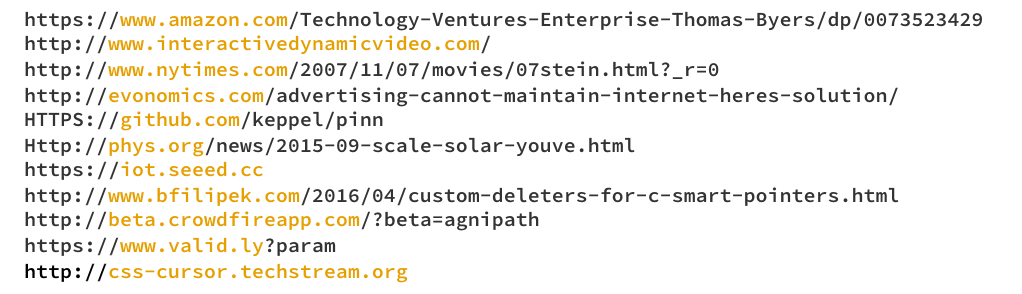

The domain of each URL excludes the protocol (e.g.`https://`) and the page path (e.g.`/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429`).

There are several ways that you could use regular expressions to extract the domain, but we suggest the following technique:

   - Using a series of characters that will match the protocol.
   - Inside a capture group, using a set that will match the character classes used in the domain.
   - Because all of the URLs either end with the domain, or continue with page path which starts with / (a character not found in any domains), we don't need to cater for this part of the URL in our regular expression.

Once you have extracted the domains, you will be building a frequency table so we can determine the most popular domains. There are over 7,000 unique domains in our dataset, so to make the frequency table easier to analyze, we'll look at only the top 20 domains.

We have provided some of the URLs from the dataset which will help you to iterate while you build your regular expression.

In [95]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])
pattern = r'https?://([\w\-\.]+)'
test_urls_clean = test_urls.str.extract(pattern, flags=re.I)
domains = hn['url'].str.extract(pattern,flags=re.I, expand=False)
top_domains = domains.value_counts().head(5)
top_domains

github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
Name: url, dtype: int64

 # Extracting URL Parts Using Multiple Capture Groups

Having extracted just the domains from the URLs, on this final screen we'll extract each of the three component parts of the URLs:

   - Protocol
   - Domain
   - Page path


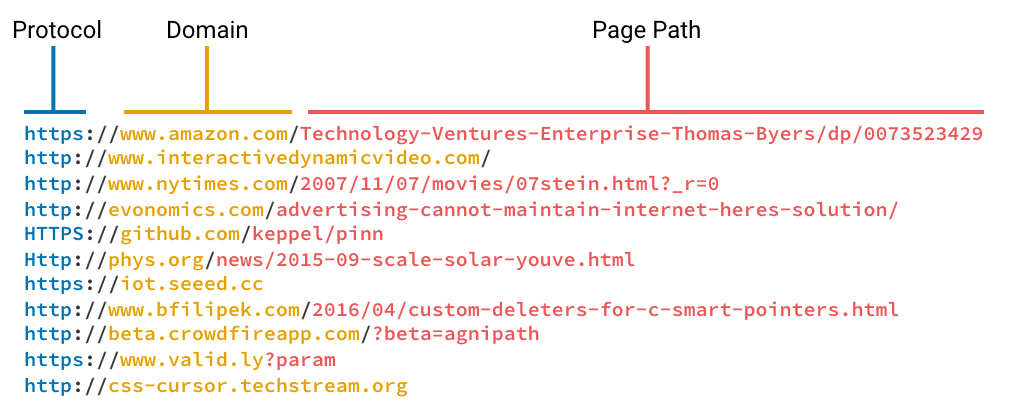

In order to do this, we'll create a regular expression with multiple capture groups. Multiple capture groups in regular expressions are defined the same way as single capture groups — using pairs of parentheses.

Let's look at how this works using the first few values from the `created_at` column in our dataset:

In [101]:
created_at = hn['created_at'].head()
created_at

0     8/4/2016 11:52
1    6/23/2016 22:20
2     6/17/2016 0:01
3     9/30/2015 4:12
4    10/31/2015 9:48
Name: created_at, dtype: object

We'll use capture groups to extract these dates and times into two columns:<br>
8/4/2016 	11:52<br>
1/26/2016 	19:30<br>
6/23/2016 	22:20<br>
6/17/2016 	0:01<br>
9/30/2015 	4:12<br>

In order to do this we can write the following regular expression:

multiple capture groups

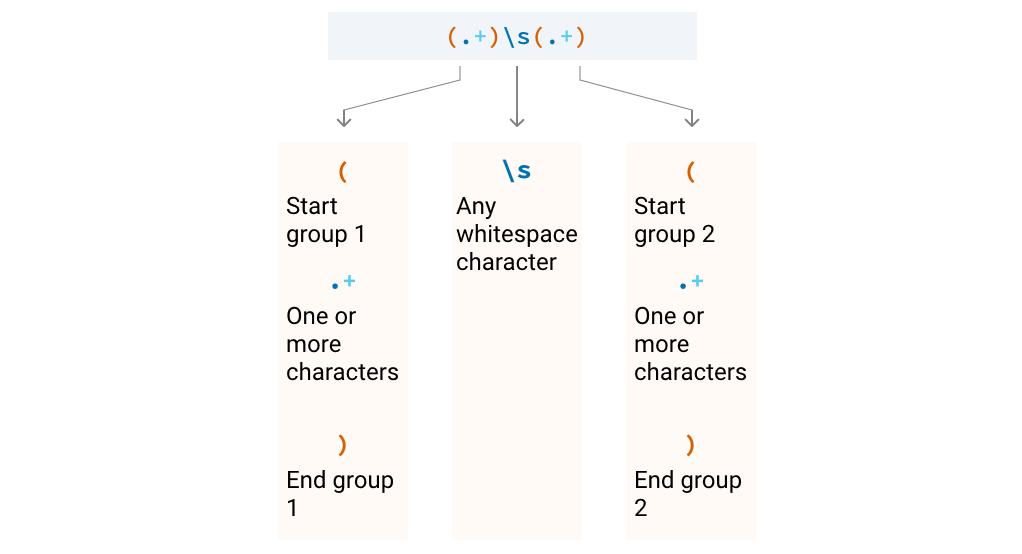

Notice how we put a space character between the capture groups, which matches the space character in the original strings.

Let's look at the result of using this regex pattern with `Series.str.extract()`:

In [103]:
pattern = r'(.+)\s(.+)'
dates_times = created_at.str.extract(pattern)
dates_times

,0,1
0,8/4/2016,11:52
1,6/23/2016,22:20
2,6/17/2016,0:01
3,9/30/2015,4:12
4,10/31/2015,9:48


The result is a dataframe with each of our capture groups defining a column of data.

Now let's write a regular expression that will extract the URL components into individual columns of a dataframe

In [105]:
# `test_urls` is available from the previous screen
pattern = r"(https?)://([\w\.\-]+)/?(.*)"

test_url_parts = test_urls.str.extract(pattern, flags=re.I)
url_parts = hn['url'].str.extract(pattern, flags=re.I)
url_parts

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


 # Using Named Capture Groups to Extract Data

Our final task will be to name these columns, which we'll do using **named capture groups**. Let's look at the example from the previous screen where we used two capture groups to extract the date and time as two separate columns:

In [106]:
created_at = hn['created_at'].head()

pattern = r"(.+) (.+)"
dates_times = created_at.str.extract(pattern)
print(dates_times)

            0      1
0    8/4/2016  11:52
1   6/23/2016  22:20
2   6/17/2016   0:01
3   9/30/2015   4:12
4  10/31/2015   9:48


In order to name a capture group we use the syntax ?P<name>, where name is the name of our capture group. This syntax goes after the open parentheses, but before the regex syntax that defines the capture group:
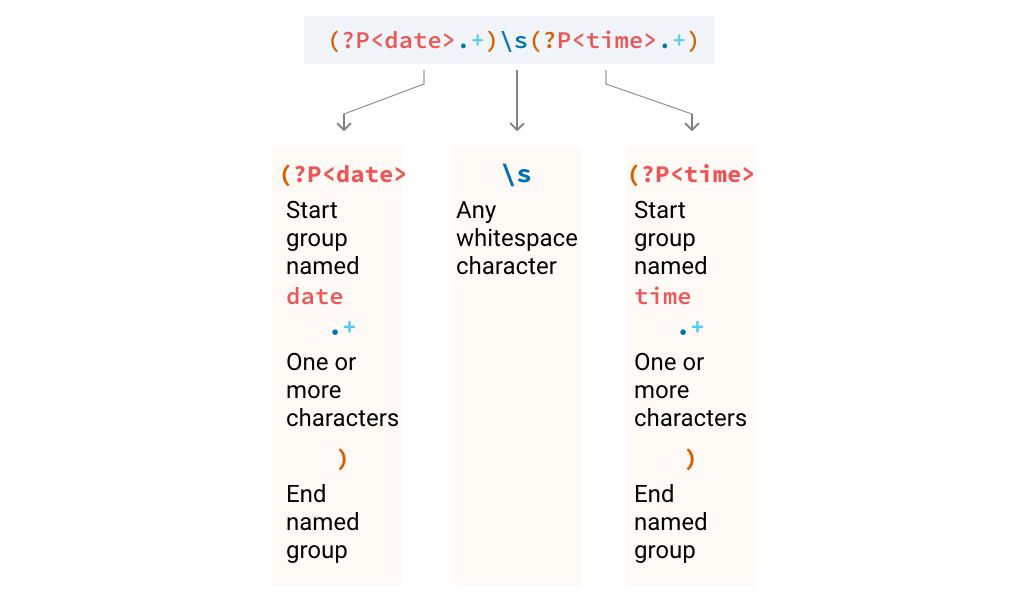

Let's look at the result of this syntax using pandas:

In [107]:
pattern = r"(?P<date>.+) (?P<time>.+)"
dates_times = created_at.str.extract(pattern)
print(dates_times)

         date   time
0    8/4/2016  11:52
1   6/23/2016  22:20
2   6/17/2016   0:01
3   9/30/2015   4:12
4  10/31/2015   9:48


Each column has a name corresponding to the name of the capture group it represents.

Let's finish this mission by adding names to our capture group from the previous screen to create a dataframe with named columns.

In [110]:
pattern = r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"
url_parts = hn['url'].str.extract(pattern, flags=re.I)
url_parts

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...
